In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [6]:
data = pd.read_csv("sheets/intrinsic.csv")


In [7]:
data = data.dropna()
a1 = data[['Actual Distance', 'A1 Filtered RSSI']].copy()
a2 = data[['Actual Distance', 'A2 Filtered RSSI']].copy()
a3 = data[['Actual Distance', 'A3 Filtered RSSI']].copy()

In [12]:
# 2nd degree regression coefficients
coeffs_a1 = np.polyfit(a1['A1 Filtered RSSI'], a1['Actual Distance'], 2)
coeffs_a2 = np.polyfit(a2['A2 Filtered RSSI'], a2['Actual Distance'], 2)
coeffs_a3 = np.polyfit(a3['A3 Filtered RSSI'], a3['Actual Distance'], 2)
print(coeffs_a1, coeffs_a2, coeffs_a3)

[0.00485199 0.09911659 0.65281373] [0.00626911 0.19144463 1.97886769] [0.00751321 0.26321518 3.01195888]


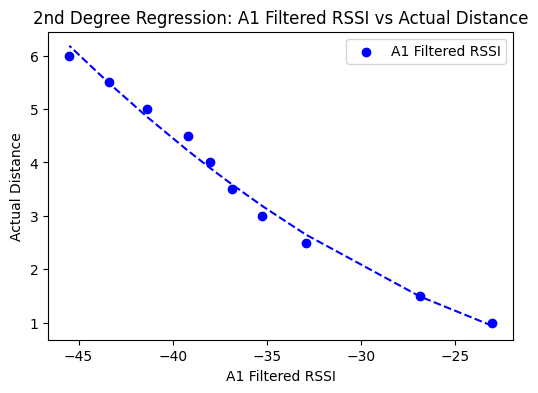

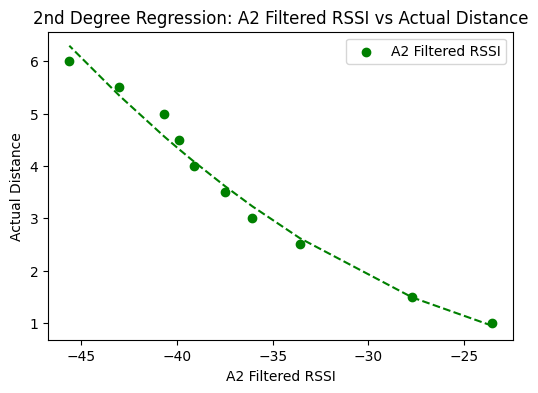

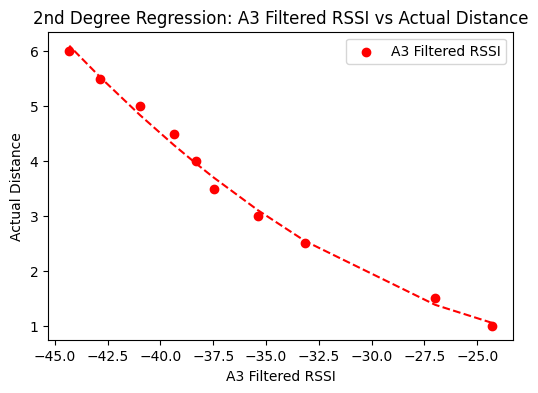

In [9]:
# Plot for A1 Filtered RSSI
plt.figure(figsize=(6, 4))
plt.scatter(a1['A1 Filtered RSSI'], a1['Actual Distance'], color='blue', label='A1 Filtered RSSI')
plt.plot(a1['A1 Filtered RSSI'], np.polyval(coeffs_a1, a1['A1 Filtered RSSI']), color='blue', linestyle='--')
plt.xlabel('A1 Filtered RSSI')
plt.ylabel('Actual Distance')
plt.title('2nd Degree Regression: A1 Filtered RSSI vs Actual Distance')
plt.legend()
plt.show()

# Plot for A2 Filtered RSSI
plt.figure(figsize=(6, 4))
plt.scatter(a2['A2 Filtered RSSI'], a2['Actual Distance'], color='green', label='A2 Filtered RSSI')
plt.plot(a2['A2 Filtered RSSI'], np.polyval(coeffs_a2, a2['A2 Filtered RSSI']), color='green', linestyle='--')
plt.xlabel('A2 Filtered RSSI')
plt.ylabel('Actual Distance')
plt.title('2nd Degree Regression: A2 Filtered RSSI vs Actual Distance')
plt.legend()
plt.show()

# Plot for A3 Filtered RSSI
plt.figure(figsize=(6, 4))
plt.scatter(a3['A3 Filtered RSSI'], a3['Actual Distance'], color='red', label='A3 Filtered RSSI')
plt.plot(a3['A3 Filtered RSSI'], np.polyval(coeffs_a3, a3['A3 Filtered RSSI']), color='red', linestyle='--')
plt.xlabel('A3 Filtered RSSI')
plt.ylabel('Actual Distance')
plt.title('2nd Degree Regression: A3 Filtered RSSI vs Actual Distance')
plt.legend()
plt.show()

In [10]:
a1["Error"] = np.abs(a1["Actual Distance"] - np.polyval(coeffs_a1, a1['A1 Filtered RSSI']))
a2["Error"] = np.abs(a2["Actual Distance"] - np.polyval(coeffs_a2, a2['A2 Filtered RSSI']))
a3["Error"] = np.abs(a3["Actual Distance"] - np.polyval(coeffs_a3, a3['A3 Filtered RSSI']))

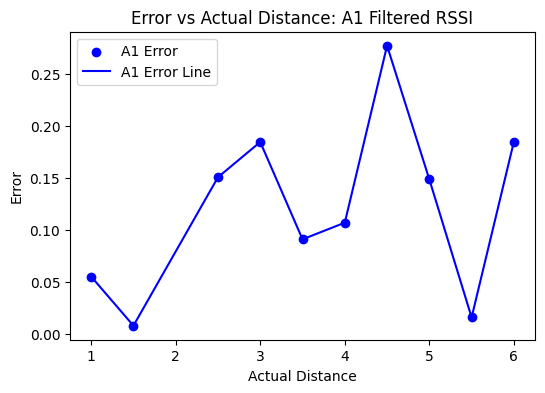

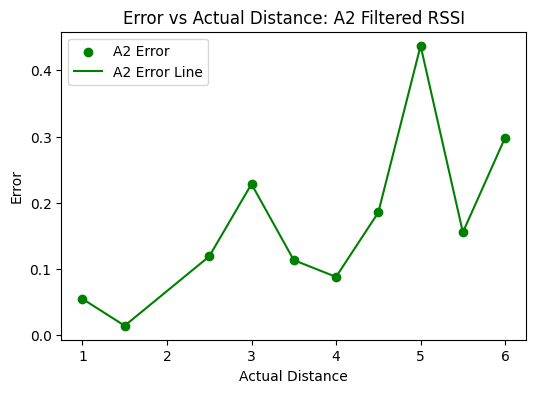

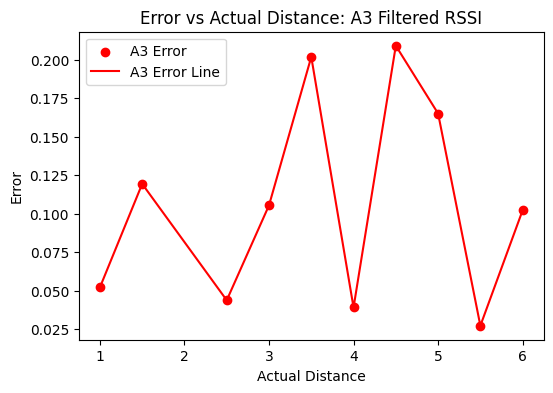

In [11]:
# Plot Error vs Actual Distance for A1
plt.figure(figsize=(6, 4))
plt.scatter(a1['Actual Distance'], a1['Error'], color='blue', label='A1 Error')
plt.plot(a1['Actual Distance'], a1['Error'], color='blue', linestyle='-', label='A1 Error Line')
plt.xlabel('Actual Distance')
plt.ylabel('Error')
plt.title('Error vs Actual Distance: A1 Filtered RSSI')
plt.legend()
plt.show()

# Plot Error vs Actual Distance for A2
plt.figure(figsize=(6, 4))
plt.scatter(a2['Actual Distance'], a2['Error'], color='green', label='A2 Error')
plt.plot(a2['Actual Distance'], a2['Error'], color='green', linestyle='-', label='A2 Error Line')
plt.xlabel('Actual Distance')
plt.ylabel('Error')
plt.title('Error vs Actual Distance: A2 Filtered RSSI')
plt.legend()
plt.show()

# Plot Error vs Actual Distance for A3
plt.figure(figsize=(6, 4))
plt.scatter(a3['Actual Distance'], a3['Error'], color='red', label='A3 Error')
plt.plot(a3['Actual Distance'], a3['Error'], color='red', linestyle='-', label='A3 Error Line')
plt.xlabel('Actual Distance')
plt.ylabel('Error')
plt.title('Error vs Actual Distance: A3 Filtered RSSI')
plt.legend()
plt.show()